
Task 1:

 Both NumPy and CuPy offer the linear algebra functions  linalg.norm() to get the norm and linalg.qr() to get the QR decomposition of matrices.

Time their performance against different sizes of square matrices.



Install pycuda

In [1]:
!pip install pycuda


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1-cp310-cp310-linux_x86_64.whl size=661205 sha256=ea777646ae14ed17ac6b1fede218333f9a6ed3a7eb52332e0cc37f02e124c358
  Stored in directory: /root/.cache/pip/wheels/12/34/d2/9a349255a4eca3a486d82c79d21e138ce2ccd90f414d9d72b8
Successfully built pycuda


In [ ]:

import pycuda.autoinit
import pycuda.driver as cuda
from pycuda.compiler import SourceModule

Import Libraries

In [ ]:
import numpy as np
import pycuda.driver as cuda
import pycuda.autoinit

In [ ]:
from pycuda.compiler import SourceModule
import timeit
import matplotlib.pyplot as plt

In [ ]:
!pip install cupy
import cupy as cp

Time performance of linalg.norm and linalg.qr in NumPy and CuPy using pyCUDA respectively



*   Define cuda kernel norm
*   Define cuda kernel qr
*   Define numPy linalg.norm() and linalg.qr() functions
*   Define cuPy linalg.norm() and linalg.qr()  functions
*   Test a matrix for operation










Define norm cuda Kernel

In [ ]:
cuda_kernel_norm = """
#include <pycuda-complex.hpp>

extern "C"
__global__ void norm_kernel(float *matrix, int size, float *result) {
    int idx = threadIdx.x + blockDim.x * blockIdx.x;
    if (idx < size) {
        atomicAdd(result, matrix[idx] * matrix[idx]);
    }
}
"""

Define qr cuda kernel

In [ ]:
cuda_kernel_qr = """
#include <pycuda-complex.hpp>

extern "C"
__global__ void qr_kernel(float *matrix, int size, float *q, float *r) {
    int idx = threadIdx.x + blockDim.x * blockIdx.x;
    if (idx < size) {
        atomicAdd(r, matrix[idx] * matrix[idx]);
        atomicAdd(q, matrix[idx]);
    }
}
"""

Sourcemodule to compile cuda kernel norm and qr compilation

In [ ]:
mod_norm = SourceModule(cuda_kernel_norm)
mod_qr = SourceModule(cuda_kernel_qr)

Functions for linalg.norm() and linalg.qr() linalg.qr()

In [ ]:
import cupy as cp


In [ ]:
# Function to performance time NumPy linalg.norm and linalg.qr
def time_numpy_linalg_functions(matrix_sizes):
    times_norm = []
    times_qr = []

    for size in matrix_sizes:
        # A random matrix generation
        matrix_host = np.random.rand(size, size).astype(np.float32)

        #  Initialize Time for NumPy linalg.norm
        start_time = timeit.default_timer()
        np.linalg.norm(matrix_host)
        elapsed_time = timeit.default_timer() - start_time
        times_norm.append((size, elapsed_time))

        # Initialize Time for NumPy linalg.qr
        start_time = timeit.default_timer()
        np.linalg.qr(matrix_host)
        elapsed_time = timeit.default_timer() - start_time
        times_qr.append((size, elapsed_time))

    return times_norm, times_qr

Functions for cuPy linalg.norm() and linalg.qr()

In [ ]:
# Function for performance time CuPy linalg.norm and linalg.qr
def time_cupy_linalg_functions(matrix_sizes):
    times_norm = []
    times_qr = []
#Repeat till the matrix size
    for size in matrix_sizes:
        # A random matrix for operation
        matrix_host = np.random.rand(size, size).astype(np.float32)

        # Transfer the random matrix to GPU using CuPy
        matrix_device = cp.asarray(matrix_host)

        # Initialize Time for CuPy linalg.norm
        start_time = timeit.default_timer()
        cp.linalg.norm(matrix_device)
        elapsed_time = timeit.default_timer() - start_time
        times_norm.append((size, elapsed_time))

        # Initialize Time for CuPy linalg.qr
        start_time = timeit.default_timer()
        cp.linalg.qr(matrix_device)
        elapsed_time = timeit.default_timer() - start_time
        times_qr.append((size, elapsed_time))

    return times_norm, times_qr

Now Let's take a test matrix for testing
** Different matrix sizes are taken to test

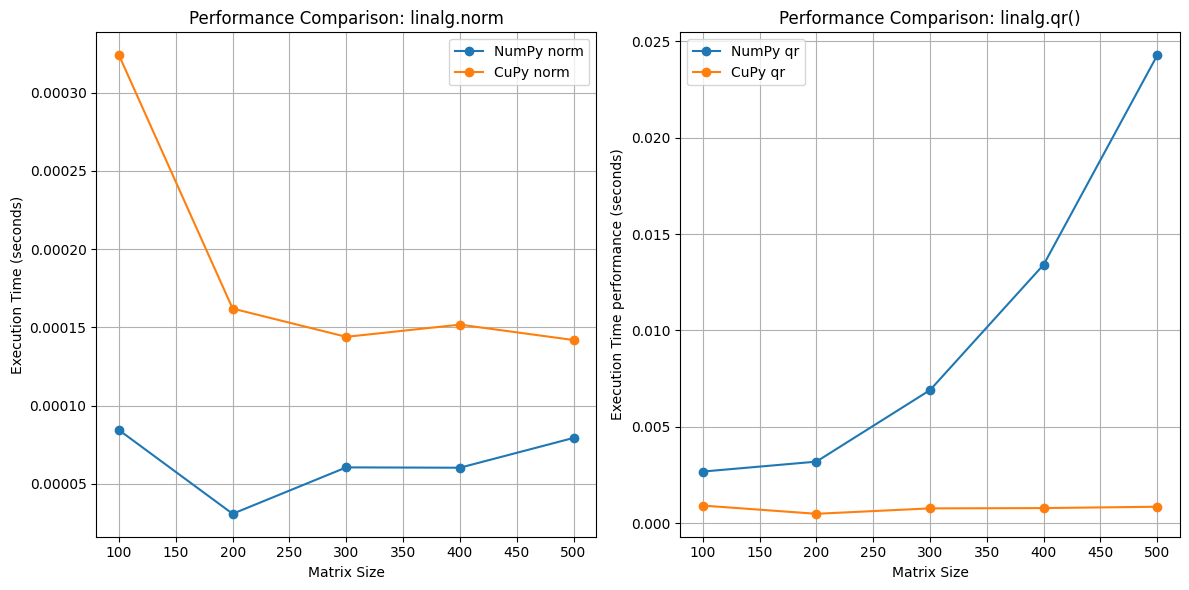

In [ ]:
#define matrix sizes
matrix_sizes = [100, 200, 300, 400, 500]

# Performance Time NumPy linalg.norm and linalg.qr
numpy_norm_times, numpy_qr_times = time_numpy_linalg_functions(matrix_sizes)

# Time performance CuPy linalg.norm and linalg.qr
cupy_norm_times, cupy_qr_times = time_cupy_linalg_functions(matrix_sizes)

# Let's Plot the results from the both respectively
plt.figure(figsize=(12, 6))

# Plot norms of both numPy and cuPy
plt.subplot(1, 2, 1)
plt.plot(*zip(*numpy_norm_times), marker='o', label='NumPy norm')
plt.plot(*zip(*cupy_norm_times), marker='o', label='CuPy norm')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: linalg.norm')
plt.legend()
plt.grid(True)

# Plot qr of both numPy and cuPy
plt.subplot(1, 2, 2)
plt.plot(*zip(*numpy_qr_times), marker='o', label='NumPy qr')
plt.plot(*zip(*cupy_qr_times), marker='o', label='CuPy qr')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time performance (seconds)')
plt.title('Performance Comparison: linalg.qr()')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Task 2

Implement vector addition using NumPy, CuPy and an example kernel used in previous exercises. Time their performance against different vector sizes.

Import Libraries

In [24]:
import numpy as np
import cupy as cp
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import timeit
import matplotlib.pyplot as plt

Let's create a function to vector addition in numPy

* Define numPy vector addition and cuPy vector addition functions
* Define cuda Kernel and compile
* Create a function for vector addition
* Test with matrices of different size
*Plot the results of three time performances of the above

In [25]:
#Define vector addition in numPy
def time_numpy_vector_addition(vector_sizes):
    times = []

    for size in vector_sizes:
        # Generate random vectors on the host
        vector1_host = np.random.rand(size).astype(np.float32)
        vector2_host = np.random.rand(size).astype(np.float32)

        # Time vector addition in NumPy
        start_time = timeit.default_timer()
        result_host = np.add(vector1_host, vector2_host)
        elapsed_time = timeit.default_timer() - start_time
        times.append((size, elapsed_time))

    return times

A function to vector addition in cuPy

In [26]:
def time_cupy_vector_addition(vector_sizes):
    times = []

    for size in vector_sizes:
        # Generate random vectors on the host
        vector1_host = np.random.rand(size).astype(np.float32)
        vector2_host = np.random.rand(size).astype(np.float32)

        # Transfer vectors to GPU
        vector1_device = cp.asarray(vector1_host)
        vector2_device = cp.asarray(vector2_host)

        # Time vector addition in CuPy
        start_time = timeit.default_timer()
        result_device = cp.add(vector1_device, vector2_device)
        elapsed_time = timeit.default_timer() - start_time
        times.append((size, elapsed_time))

    return times

Now define cuda kernel for vector addition

In [27]:
cuda_kernel_code = """
__global__ void vector_addition(float *a, float *b, float *c, int size) {
    int idx = threadIdx.x + blockDim.x * blockIdx.x;
    if (idx < size) {
        c[idx] = a[idx] + b[idx];
    }
}
"""

# Compile CUDA kernel
cuda_module = SourceModule(cuda_kernel_code)
vector_addition_kernel = cuda_module.get_function("vector_addition")


In [28]:
cuda_kernel_vector_add = """
extern "C"
__global__ void vector_add_kernel(float *vector1, float *vector2, float *result, int size) {
    int idx = threadIdx.x + blockDim.x * blockIdx.x;
    if (idx < size) {
        result[idx] = vector1[idx] + vector2[idx];
    }
}
"""

Compile the cuda kernel for vector addition

In [29]:
mod_vector_add = SourceModule(cuda_kernel_vector_add)

# Get function handle
vector_add_kernel = mod_vector_add.get_function("vector_add_kernel")

In [30]:
def vector_addition_gpu(a, b):
    size = len(a)

    # Allocate GPU memory
    a_gpu = cuda.mem_alloc(a.nbytes)
    b_gpu = cuda.mem_alloc(b.nbytes)
    c_gpu = cuda.mem_alloc(b.nbytes)

    # Copy data to GPU
    cuda.memcpy_htod(a_gpu, a)
    cuda.memcpy_htod(b_gpu, b)

    # Set up grid and block sizes
    block_size = 256
    grid_size = (size + block_size - 1) // block_size

    # Launch the CUDA kernel
    vector_addition_kernel(a_gpu, b_gpu, c_gpu, np.int32(size), block=(block_size, 1, 1), grid=(grid_size, 1))

    # Copy the result back to the host
    c_result = np.empty_like(a)
    cuda.memcpy_dtoh(c_result, c_gpu)

    # Free GPU memory
    a_gpu.free()
    b_gpu.free()
    c_gpu.free()

    return c_result


Let's create a function for vector addition in pyCuda
** Example kernel as asked in moodle

In [31]:
# Function to time vector addition with pyCUDA
def time_cuda_vector_addition(vector_sizes):
    times = []

    for size in vector_sizes:
        # Generate random vectors on the host
        vector1_host = np.random.rand(size).astype(np.float32)
        vector2_host = np.random.rand(size).astype(np.float32)

        # Allocate GPU memory
        vector1_device = cuda.mem_alloc(vector1_host.nbytes)
        vector2_device = cuda.mem_alloc(vector2_host.nbytes)

        # Copy vectors to GPU
        cuda.memcpy_htod(vector1_device, vector1_host)
        cuda.memcpy_htod(vector2_device, vector2_host)

        # Allocate GPU memory for the result
        result_device = cuda.mem_alloc(vector1_host.nbytes)

        # Time vector addition with pyCUDA
        block_size = 256
        grid_size = (size + block_size - 1) // block_size

        start_time = timeit.default_timer()
        vector_add_kernel(vector1_device, vector2_device, result_device, np.int32(size), block=(block_size, 1, 1), grid=(grid_size, 1, 1))
        elapsed_time = timeit.default_timer() - start_time

        # Copy the result back to the host
        result_host = np.empty_like(vector1_host)
        cuda.memcpy_dtoh(result_host, result_device)

        times.append((size, elapsed_time))

    return times


Let's take vector sizes to test

NumPy Result (size 2000): [1.2396824 0.7862382 1.442729  ... 1.1828821 0.7712729 1.4740477]
CuPy Result (size 2000): [1.0448573  1.1433492  0.6109062  ... 0.69636154 0.48777676 1.1002375 ]
PyCUDA Result (size 2000): [0.68798167 1.5047908  1.6952708  ... 0.25525206 1.6602746  1.1985798 ]


NumPy Result (size 5000): [1.7745234  0.37817195 0.65793973 ... 1.6255198  1.3851833  0.35728186]
CuPy Result (size 5000): [1.5107608  1.6752102  1.6214314  ... 1.0283368  0.5441721  0.49458873]
PyCUDA Result (size 5000): [0.7487576 0.3221407 1.8910583 ... 0.9717635 1.0778954 0.5034439]


NumPy Result (size 10000): [0.8823049  0.63626933 1.305466   ... 1.1032772  1.153188   0.93009686]
CuPy Result (size 10000): [0.84313864 0.23620224 0.87727773 ... 0.8916837  1.4732941  0.5930585 ]
PyCUDA Result (size 10000): [0.8464358  0.60165477 1.5325568  ... 0.59654397 1.1271917  0.8680633 ]


NumPy Result (size 50000): [0.9744457  0.738948   0.5829165  ... 0.7240523  0.48847532 0.5034759 ]
CuPy Result (size 5000

/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py:658: UserWarning: device_allocation in out-of-thread context could not be cleaned up
  frame = None


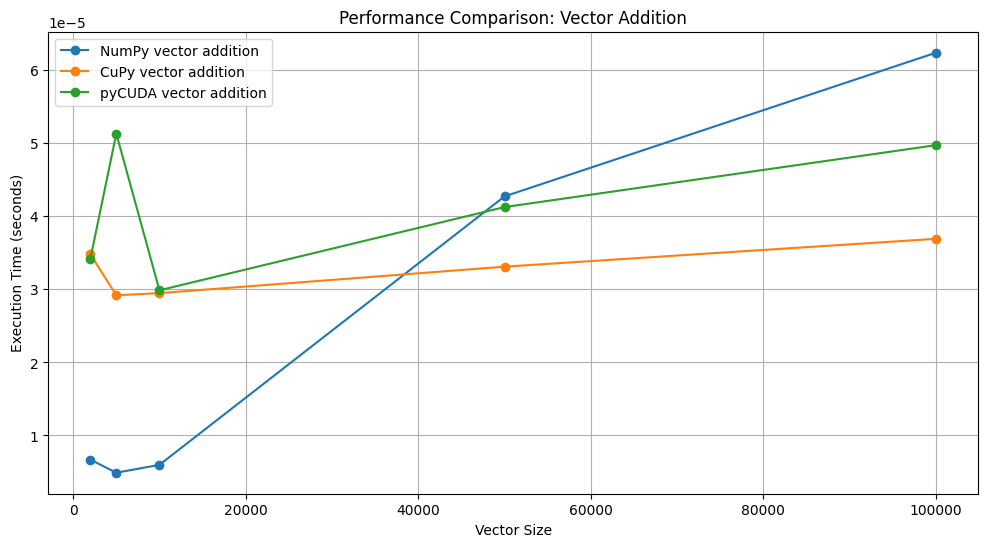

In [32]:
vector_sizes = [2000, 5000, 10000, 50000, 100000]
for size in vector_sizes:
    # NumPy
    a_np = np.random.rand(size).astype(np.float32)
    b_np = np.random.rand(size).astype(np.float32)
    result_np = a_np + b_np
    print(f"NumPy Result (size {size}): {result_np}")

    # CuPy
    a_cp = cp.random.rand(size, dtype=np.float32)
    b_cp = cp.random.rand(size, dtype=np.float32)
    result_cp = cp.add(a_cp, b_cp)
    print(f"CuPy Result (size {size}): {result_cp}")

    # PyCUDA
    a_cuda = np.random.rand(size).astype(np.float32)
    b_cuda = np.random.rand(size).astype(np.float32)
    result_cuda = vector_addition_gpu(a_cuda, b_cuda)
    print(f"PyCUDA Result (size {size}): {result_cuda}")
    print("\n")

# Time the performance NumPy vector addition
numpy_times = time_numpy_vector_addition(vector_sizes)

# Time CuPy the performance vector addition
cupy_times = time_cupy_vector_addition(vector_sizes)

# Time pyCUDA (example kernel) vector addition
cuda_times = time_cuda_vector_addition(vector_sizes)

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(*zip(*numpy_times), marker='o', label='NumPy vector addition')
plt.plot(*zip(*cupy_times), marker='o', label='CuPy vector addition')
plt.plot(*zip(*cuda_times), marker='o', label='pyCUDA vector addition')

plt.xlabel('Vector Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: Vector Addition')
plt.legend()
plt.grid(True)
plt.show()

Task 3

Implement matrix multiplication using NumPy, CuPy and an example kernel used in previous exercises. Time their performance against different matrix sizes.

import libraries

In [33]:
import numpy as np
import cupy as cp
import pycuda.autoinit
import pycuda.driver as cuda
from pycuda.compiler import SourceModule
import timeit
import matplotlib.pyplot as plt

* Define a cuda kernel for matrix multiplication
* Function to matrix multiplication using NumPy
* Function to matrix multiplication using CuPy
* Function to matrix multiplication using Pycuda(from previous exercises)
* Test a matrix of different sizes and plot the result of time performances

In [34]:
# Define CUDA kernel for matrix multiplication
modd = SourceModule("""
__global__ void matrix_multiplication(const double* A, const double* B, double* C, int N, int M, int K)
{
    uint row = blockIdx.y * blockDim.y + threadIdx.y;
    uint col = blockIdx.x * blockDim.x + threadIdx.x;
    uint mul_result = 0;

    for (int k = 0; k < N; k++)
    {
        mul_result += A[row * N + k] * B[k * M + col];
    }
    C[row * M + col] = mul_result;
}
""")

In [35]:
# Function to time matrix multiplication with NumPy
def time_numpy_matrix_multiplication(matrix_sizes):
    times = []

    for size in matrix_sizes:
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)

        start_time = timeit.default_timer()
        np.dot(A, B)
        elapsed_time = timeit.default_timer() - start_time
        times.append((size, elapsed_time))

    return times

In [36]:
# Function to time matrix multiplication with CuPy
def time_cupy_matrix_multiplication(matrix_sizes):
    times = []

    for size in matrix_sizes:
        A = cp.random.rand(size, size)
        B = cp.random.rand(size, size)

        start_time = timeit.default_timer()
        cp.dot(A, B)
        elapsed_time = timeit.default_timer() - start_time
        times.append((size, elapsed_time))

    return times

In [44]:
# Function to time matrix multiplication with pyCUDA
def time_cuda_matrix_multiplication(matrix_sizes):
    times = []

    for size in matrix_sizes:
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)

        # Print the matrices A and B
        print(f"Matrix A (size {size}):\n{A}\n")
        print(f"Matrix B (size {size}):\n{B}\n")

        a_gpu = cuda.mem_alloc(A.size * A.dtype.itemsize)
        cuda.memcpy_htod(a_gpu, A)

        b_gpu = cuda.mem_alloc(B.size * B.dtype.itemsize)
        cuda.memcpy_htod(b_gpu, B)

        c_gpu = cuda.mem_alloc(B.size * B.dtype.itemsize)

        block_size = (32, 32, 1)
        grid_size = ((size + block_size[0] - 1) // block_size[0],
                     (size + block_size[1] - 1) // block_size[1])

        matrix_multiplication = modd.get_function("matrix_multiplication")
        start_time = timeit.default_timer()
        matrix_multiplication(a_gpu, b_gpu, c_gpu, np.int32(size), np.int32(size), np.int32(size),
                               block=block_size, grid=grid_size)
        elapsed_time = timeit.default_timer() - start_time

        c_cpu = np.dot(A, B)

        c_gpu_result = np.empty_like(c_cpu)
        cuda.memcpy_dtoh(c_gpu_result, c_gpu)

        # Print the matrices after multiplication
        print(f"Matrix Multiplication Result (size {size}) using NumPy:\n{c_cpu}\n")
        print(f"Matrix Multiplication Result (size {size}) using PyCUDA:\n{c_gpu_result}\n")

        if not np.allclose(c_cpu, c_gpu_result):
            print("GPU matrix multiplication!")

        a_gpu.free()
        b_gpu.free()
        c_gpu.free()

        times.append((size, elapsed_time))

    return times


Let's take a matrix of different sizes and see the results in plots

Matrix A (size 50):
[[0.04827465 0.7557783  0.04769892 ... 0.11814061 0.30278892 0.10590581]
 [0.96243693 0.52641922 0.42072335 ... 0.24432072 0.79057303 0.73966332]
 [0.19172772 0.99908356 0.59379399 ... 0.9403257  0.34011197 0.60902058]
 ...
 [0.69541004 0.29859102 0.13286789 ... 0.47964174 0.50219873 0.65136285]
 [0.95696217 0.87399007 0.93267979 ... 0.42171464 0.26008936 0.52317866]
 [0.90481234 0.67528289 0.36802414 ... 0.58903329 0.61359083 0.55616007]]

Matrix B (size 50):
[[0.55480139 0.01439598 0.76165424 ... 0.25074579 0.04670182 0.23962633]
 [0.04225826 0.54650197 0.17511895 ... 0.96826135 0.90860634 0.1671803 ]
 [0.40984728 0.7528013  0.64379367 ... 0.39263384 0.78514508 0.18093334]
 ...
 [0.84812    0.66266832 0.29118068 ... 0.10923315 0.48814062 0.51261625]
 [0.61262301 0.21045352 0.58043851 ... 0.18030877 0.04753162 0.3395547 ]
 [0.84539828 0.2389648  0.41946037 ... 0.67336367 0.61114223 0.15720221]]

Matrix Multiplication Result (size 50) using NumPy:
[[12.4427839  11.7

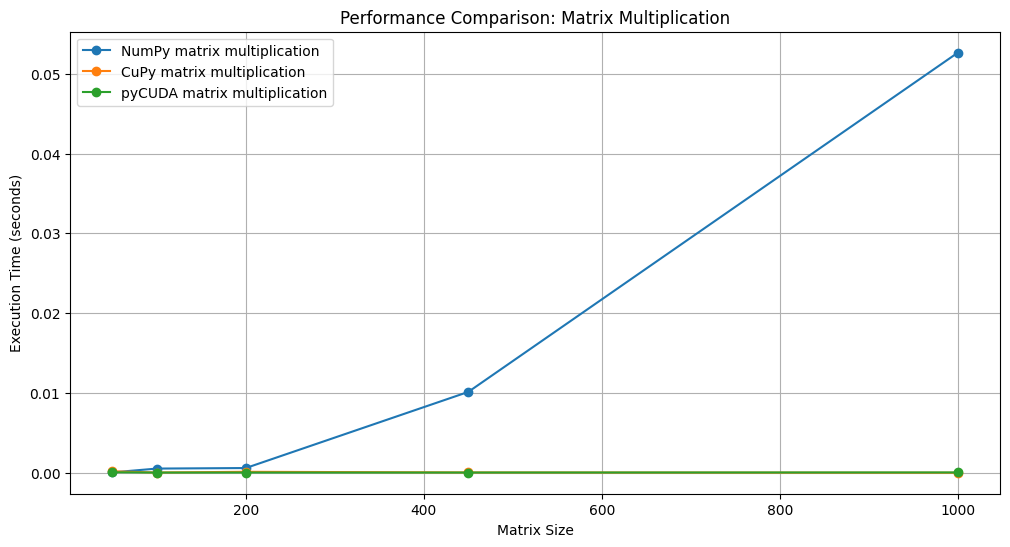

In [48]:
# Matrix sizes to test
matrix_sizes = [50, 100, 200, 450, 1000]

# Time NumPy matrix multiplication
numpy_times = time_numpy_matrix_multiplication(matrix_sizes)

# Time CuPy matrix multiplication
cupy_times = time_cupy_matrix_multiplication(matrix_sizes)

# Time pyCUDA matrix multiplication
cuda_times = time_cuda_matrix_multiplication(matrix_sizes)

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(*zip(*numpy_times), marker='o', label='NumPy matrix multiplication')
plt.plot(*zip(*cupy_times), marker='o', label='CuPy matrix multiplication')
plt.plot(*zip(*cuda_times), marker='o', label='pyCUDA matrix multiplication')

plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: Matrix Multiplication')
plt.legend()
plt.grid(True)
plt.show()